In [1]:
!pip install sqlalchemy


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score,classification_report
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle


In [97]:
df=pd.read_csv('/content/laptops_dataset.csv')
df.head()

,Title,Discount_Price,Original_Price,Rating,Number_of_Reviews,Discount(%)
0,Unknown,0,0,0.0,0,0
1,Unknown,0,0,0.0,0,0
2,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,"₹16,990","₹34,990",3.7,174,51
3,CHUWI Intel Core i5 12th Gen 12450H - (16 GB/5...,"₹29,990","₹59,990",4.7,0,50
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990","₹32,999",3.8,71,51


In [98]:
df.isnull().sum()

,0
Title,0
Discount_Price,0
Original_Price,0
Rating,0
Number_of_Reviews,0
Discount(%),0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1179 non-null   object 
 1   Discount_Price     1179 non-null   object 
 2   Original_Price     1179 non-null   object 
 3   Rating             1179 non-null   float64
 4   Number_of_Reviews  1179 non-null   object 
 5   Discount(%)        1179 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 55.4+ KB


In [100]:
df['Discount_Price'] = df['Discount_Price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Original_Price'] = df['Original_Price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [101]:
df['Number_of_Reviews'] = df['Number_of_Reviews'].str.replace(',', '', regex=False).astype(float)


In [102]:
df['Title'] = df['Title'].str.title()


In [103]:
df['Title'].value_counts()

,count
Title,
Unknown,243
Msi Thin 15 Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvidia Gef...,4
Lenovo Loq Intel Core I5 12Th Gen 12450Hx - (16 Gb/512 Gb Ssd/Windows 11 Home/6 Gb Graphics/Nvidia Gef...,4
Asus Tuf Gaming A15 Amd Ryzen 7 Octa Core 7435Hs - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvi...,4
Chuwi Intel Celeron Quad Core 12Th Gen N100 - (8 Gb/256 Gb Ssd/Windows 11 Home) Gemibook Plus Laptop,3
...,...
Acer Extensa Intel Core I3 11Th Gen 1115G4 - (8 Gb/512 Gb Ssd/Windows 11 Home) Ex 215-54/ Ex 215-54-35...,1
"Asus Zenbook 14 Oled (2025) With Office 2024 + M365 Basic*, Ai Pc Intel Core Ultra 5 225H - (16 Gb/1 T...",1
Hp 15 G10 (2025) Amd Ryzen 3 Quad Core 7320U - (8 Gb/512 Gb Ssd/Windows 11 Home) 15 G10 Thin And Light...,1


In [104]:
df.dtypes

,0
Title,object
Discount_Price,float64
Original_Price,float64
Rating,float64
Number_of_Reviews,float64
Discount(%),int64


In [105]:
df = df[df['Title'] != 'Unknown']


In [106]:
df['Title'].value_counts()

,count
Title,
Msi Thin 15 Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvidia Gef...,4
Asus Tuf Gaming A15 Amd Ryzen 7 Octa Core 7435Hs - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvi...,4
Lenovo Loq Intel Core I5 12Th Gen 12450Hx - (16 Gb/512 Gb Ssd/Windows 11 Home/6 Gb Graphics/Nvidia Gef...,4
Hp Victus Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvidia Gefor...,3
Chuwi Intel Celeron Quad Core 12Th Gen N100 - (8 Gb/256 Gb Ssd/Windows 11 Home) Gemibook Plus Laptop,3
...,...
Acer Extensa Intel Core I3 11Th Gen 1115G4 - (8 Gb/512 Gb Ssd/Windows 11 Home) Ex 215-54/ Ex 215-54-35...,1
"Asus Zenbook 14 Oled (2025) With Office 2024 + M365 Basic*, Ai Pc Intel Core Ultra 5 225H - (16 Gb/1 T...",1
Hp 15 G10 (2025) Amd Ryzen 3 Quad Core 7320U - (8 Gb/512 Gb Ssd/Windows 11 Home) 15 G10 Thin And Light...,1


In [107]:
df.shape

(936, 6)

In [108]:
df.duplicated().sum()

np.int64(64)

In [109]:
df=df.drop_duplicates()

In [110]:
df.shape

(872, 6)

In [111]:
df.describe()

,Discount_Price,Original_Price,Rating,Number_of_Reviews,Discount(%)
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,56313.982798,75148.581422,3.705619,72.490826,27.751147
std,28824.308021,34843.389203,1.352169,177.691376,12.245433
min,11990.000000,0.000000,0.000000,0.000000,0.000000
25%,35996.750000,51374.000000,3.900000,1.000000,20.000000
50%,49690.000000,70000.000000,4.200000,10.000000,28.000000
75%,69990.000000,89992.250000,4.300000,60.000000,35.250000
max,239990.000000,256999.000000,5.000000,2085.000000,60.000000


Outliers

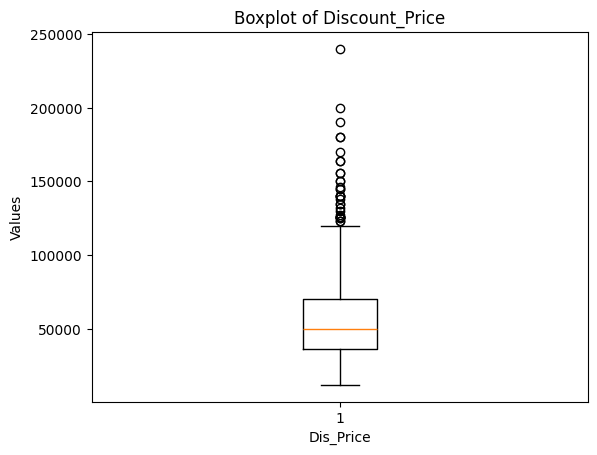

In [112]:
plt.boxplot(df['Discount_Price'])
plt.title('Boxplot of Discount_Price')
plt.xlabel('Dis_Price')
plt.ylabel('Values')
plt.show()

In [113]:
Q1=df['Discount_Price'].quantile(0.25)
Q3=df['Discount_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_1=df[(df['Discount_Price']>=lower_bound) & (df['Discount_Price']<= upper_bound)]
df_1.shape

(839, 6)

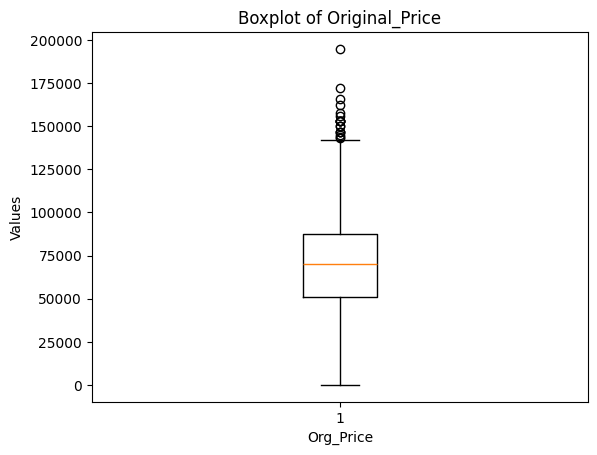

In [114]:
plt.boxplot(df_1['Original_Price'])
plt.title('Boxplot of Original_Price')
plt.xlabel('Org_Price')
plt.ylabel('Values')
plt.show()

In [115]:
Q1=df_1['Discount_Price'].quantile(0.25)
Q3=df_1['Discount_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_2=df_1[(df_1['Discount_Price']>=lower_bound) & (df_1['Discount_Price']<= upper_bound)]
df_2.shape

(829, 6)

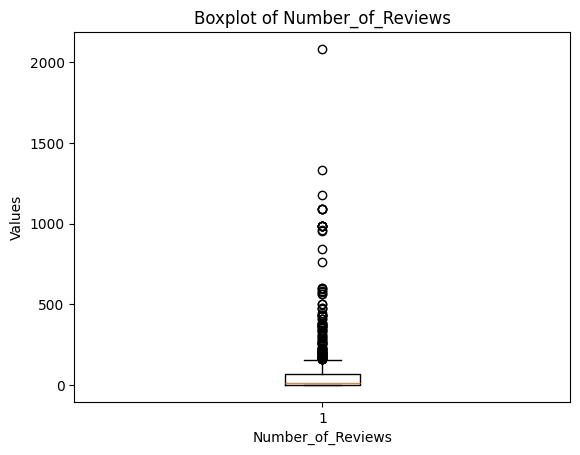

In [116]:
plt.boxplot(df_2['Number_of_Reviews'])
plt.title('Boxplot of Number_of_Reviews')
plt.xlabel('Number_of_Reviews')
plt.ylabel('Values')
plt.show()

In [117]:
Q1=df_2['Number_of_Reviews'].quantile(0.25)
Q3=df_2['Number_of_Reviews'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_3=df_2[(df_2['Number_of_Reviews']>=lower_bound) & (df_2['Number_of_Reviews']<= upper_bound)]
df_3.shape

(724, 6)

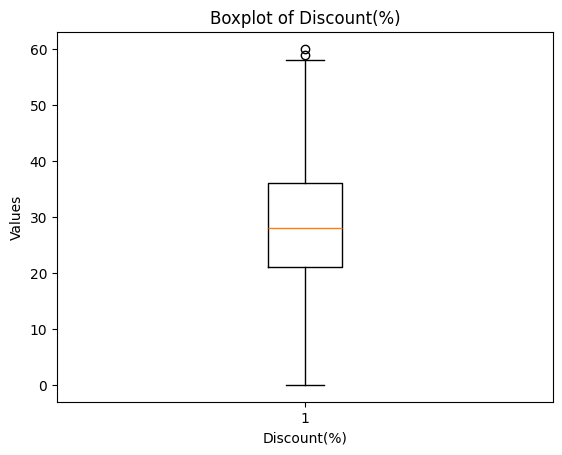

In [118]:
plt.boxplot(df_3['Discount(%)'])
plt.title('Boxplot of Discount(%)')
plt.xlabel('Discount(%)')
plt.ylabel('Values')
plt.show()

In [119]:
Q1=df_3['Discount(%)'].quantile(0.25)
Q3=df_3['Discount(%)'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_4=df_3[(df_3['Discount(%)']>=lower_bound) & (df_3['Discount(%)']<= upper_bound)]
df_4.shape

(722, 6)

Visualization

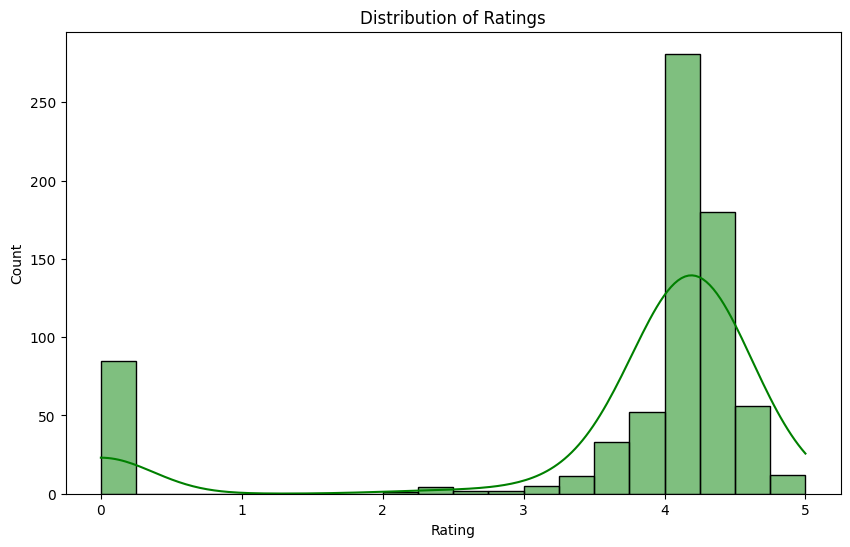

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(df_3['Rating'], kde=True,bins=20,color='green')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [121]:
top_titles = df_3['Title'].value_counts().head(10)

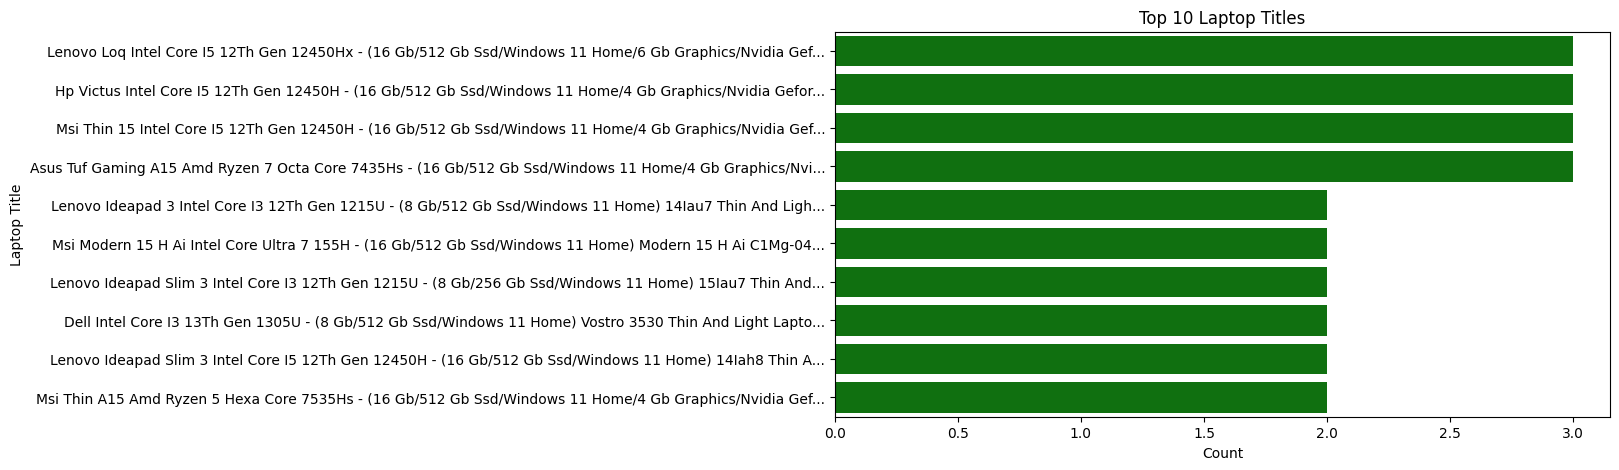

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.values, y=top_titles.index,color='green')
plt.title('Top 10 Laptop Titles')
plt.xlabel('Count')
plt.ylabel('Laptop Title')
plt.show()

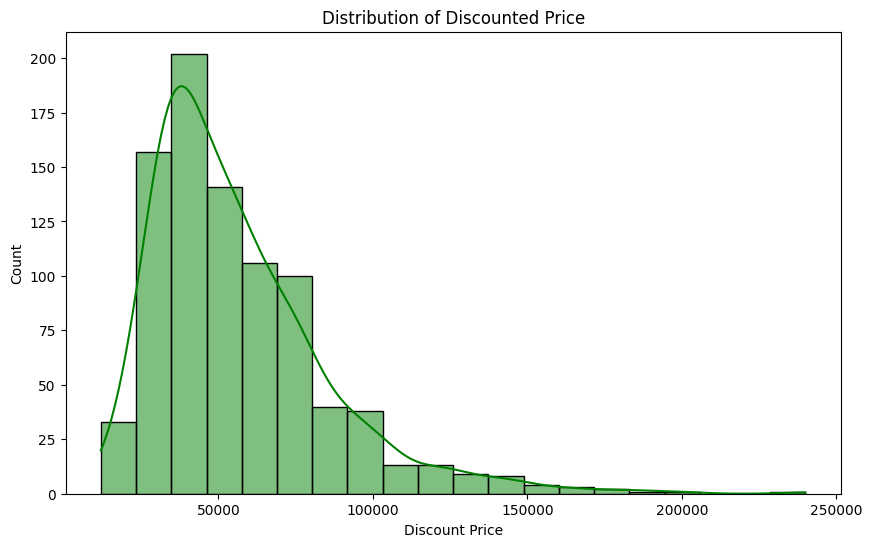

In [123]:
plt.figure(figsize=(10,6))
sns.histplot(df['Discount_Price'], kde=True,bins=20,color='green')
plt.title("Distribution of Discounted Price")
plt.xlabel("Discount Price")
plt.ylabel("Count")
plt.show()

In [124]:
discount_rating = df_3.groupby('Discount(%)')['Rating'].mean().reset_index()

In [125]:
discount_rating = discount_rating.sort_values('Discount(%)')

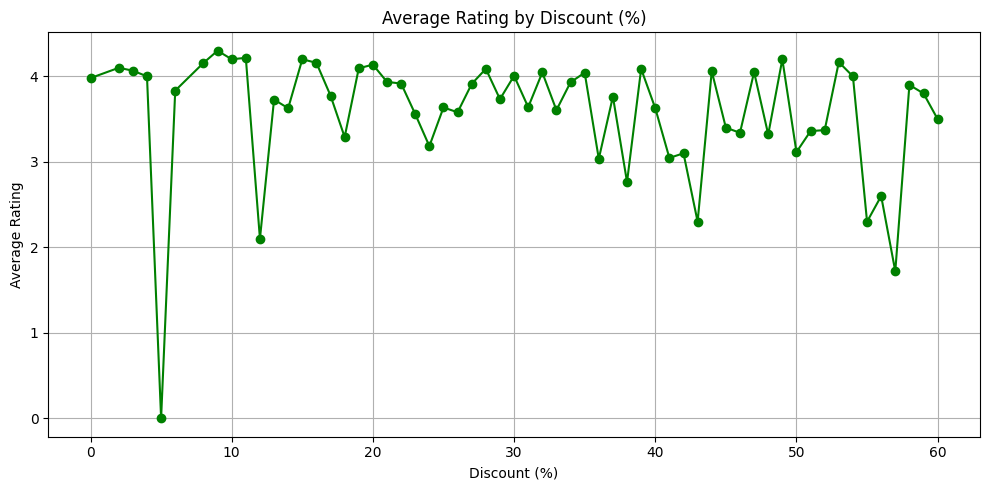

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(discount_rating['Discount(%)'], discount_rating['Rating'], marker='o', color='green')
plt.title('Average Rating by Discount (%)')
plt.xlabel('Discount (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
title_stats = df_3.groupby('Title')[['Rating']].mean().reset_index()


In [128]:
title_stats = title_stats.sort_values(by='Rating',ascending=False).head(10)

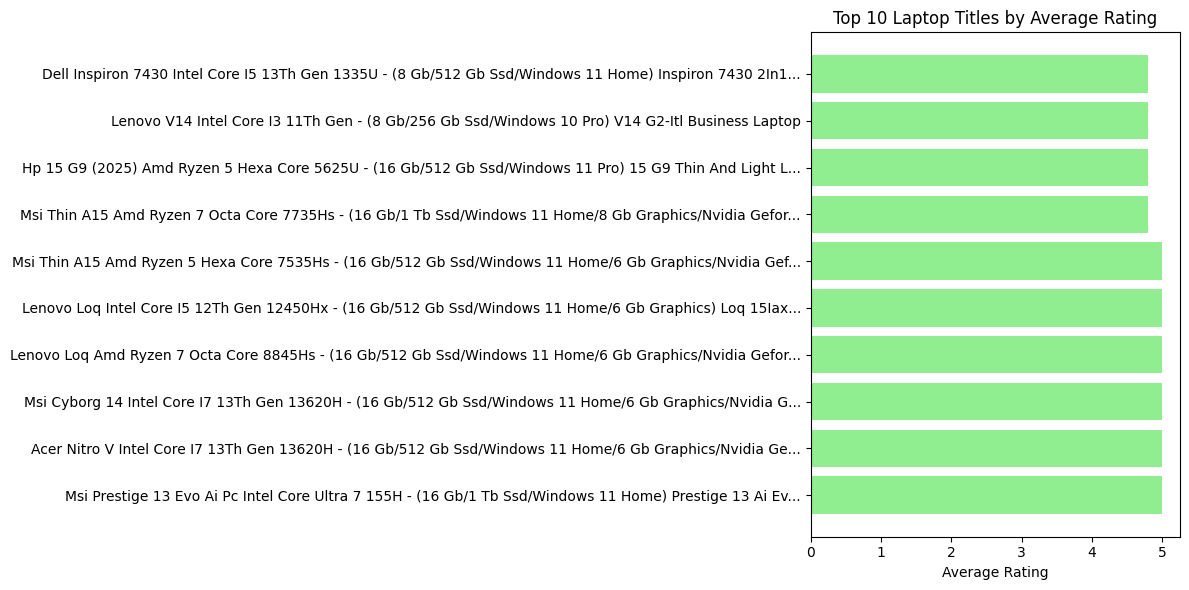

In [129]:
plt.figure(figsize=(12, 6))
plt.barh(title_stats['Title'], title_stats['Rating'],color='lightgreen')
plt.xlabel('Average Rating')
plt.title('Top 10 Laptop Titles by Average Rating')
plt.tight_layout()
plt.show()

In [130]:
discount_stats = df_3.groupby('Title')[['Discount(%)']].mean().reset_index()
discount_stats = discount_stats.sort_values(by='Discount(%)', ascending=False).head(10)

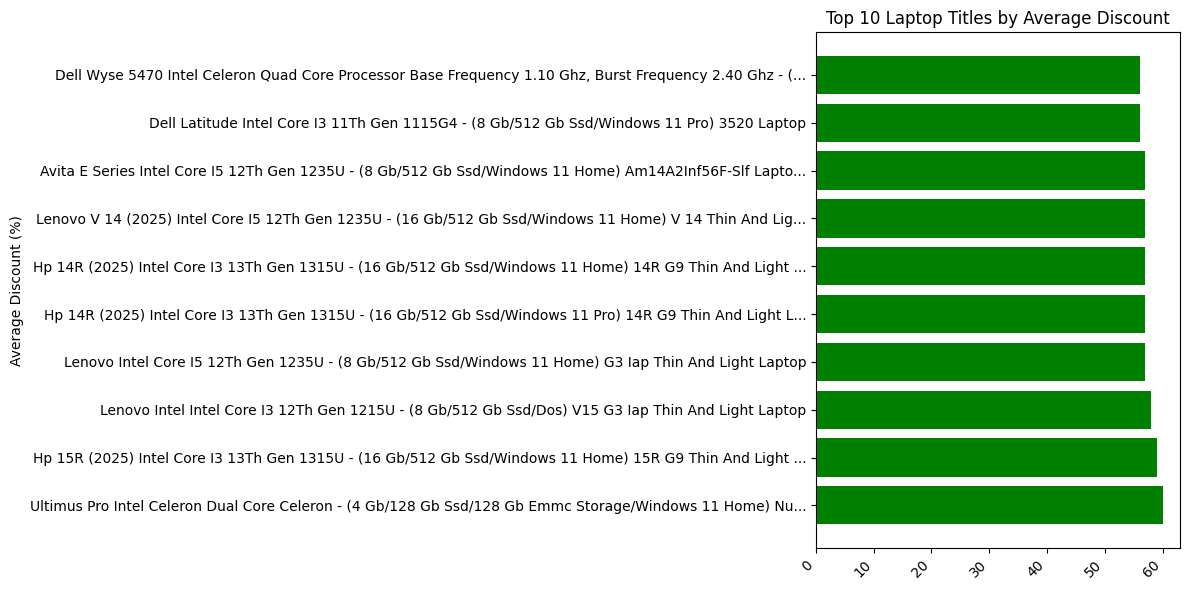

In [131]:
plt.figure(figsize=(12, 6))
plt.barh(discount_stats['Title'], discount_stats['Discount(%)'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Discount (%)')
plt.title('Top 10 Laptop Titles by Average Discount')
plt.tight_layout()
plt.show()

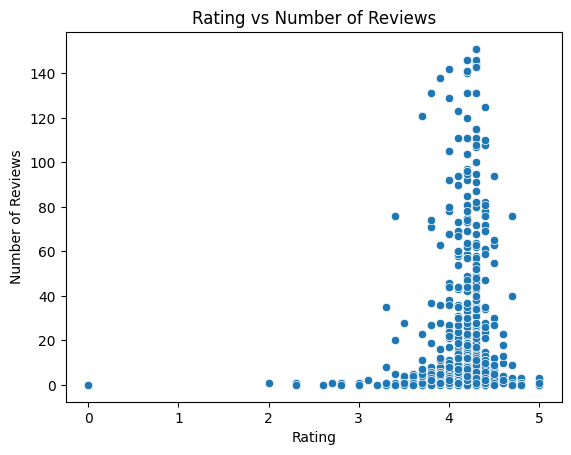

In [132]:
sns.scatterplot(data=df_3, x='Rating', y='Number_of_Reviews')
plt.title("Rating vs Number of Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

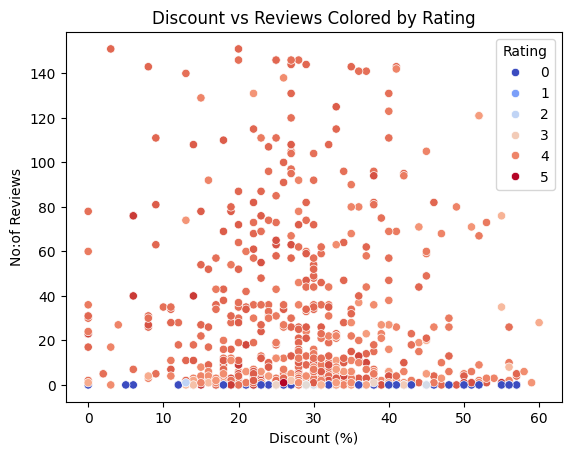

In [133]:
sns.scatterplot(data=df_3, x='Discount(%)', y='Number_of_Reviews', hue='Rating', palette='coolwarm')
plt.title("Discount vs Reviews Colored by Rating")
plt.xlabel("Discount (%)")
plt.ylabel("No:of Reviews")
plt.legend(title="Rating")
plt.show()

Saving Cleaned Dataset for Future Use with SQLAlchemy

In [137]:
engine = create_engine('sqlite:///laptops.db')

In [138]:
df_3.to_sql('laptops', con=engine, if_exists='replace', index=False)

724

In [139]:
df_3from_db = pd.read_sql('SELECT * FROM laptops', con=engine)
df_3from_db.head()

,Title,Discount_Price,Original_Price,Rating,Number_of_Reviews,Discount(%)
0,Chuwi Intel Core I5 12Th Gen 12450H - (16 Gb/5...,29990.0,59990.0,4.7,0.0,50
1,Acer Aspire 3 Intel Celeron Dual Core - (8 Gb/...,15990.0,32999.0,3.8,71.0,51
2,Lenovo V15 Amd Ryzen 3 Quad Core 7Th Gen 7320U...,27450.0,44990.0,4.0,5.0,38
3,Acer Aspire 3 Intel Celeron Dual Core - (8 Gb/...,19990.0,35999.0,3.8,71.0,44
4,Msi Thin 15 Intel Core I5 12Th Gen 12450H - (1...,51990.0,70990.0,4.3,100.0,26


In [ ]:
from google.colab import files
files.download('laptops.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unsupervised ML

In [140]:
x=df_3[['Title', 'Discount_Price', 'Original_Price', 'Rating','Number_of_Reviews', 'Discount(%)']]

In [141]:
x['Title'].value_counts()

,count
Title,
Lenovo Loq Intel Core I5 12Th Gen 12450Hx - (16 Gb/512 Gb Ssd/Windows 11 Home/6 Gb Graphics/Nvidia Gef...,3
Hp Victus Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvidia Gefor...,3
Msi Thin 15 Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvidia Gef...,3
Asus Tuf Gaming A15 Amd Ryzen 7 Octa Core 7435Hs - (16 Gb/512 Gb Ssd/Windows 11 Home/4 Gb Graphics/Nvi...,3
Lenovo Ideapad 3 Intel Core I3 12Th Gen 1215U - (8 Gb/512 Gb Ssd/Windows 11 Home) 14Iau7 Thin And Ligh...,2
...,...
Msi Prestige 13 Evo Ai Pc Intel Core Ultra 5 125H - (16 Gb/1 Tb Ssd/Windows 11 Home) Prestige 13 Ai Ev...,1
Lenovo Ideapad Slim 3 Intel Core I5 12Th Gen 12450H - (16 Gb/512 Gb Ssd/Windows 11 Home) 15Iah8 Thin A...,1
Acer Aspire 3 Intel Celeron Dual Core N4500 - (8 Gb/256 Gb Ssd/Windows 11 Home) A325-45 Thin And Light...,1


In [142]:
x['Title']=LabelEncoder().fit_transform(x['Title'])

In [143]:
scaler=StandardScaler()
x_Scaled=scaler.fit_transform(x)

KMeans

In [144]:
inertia = []
for k in range(1,8):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(x_Scaled)
  inertia.append(kmeans.inertia_)

In [145]:
x_axis=np.arange(1,8)

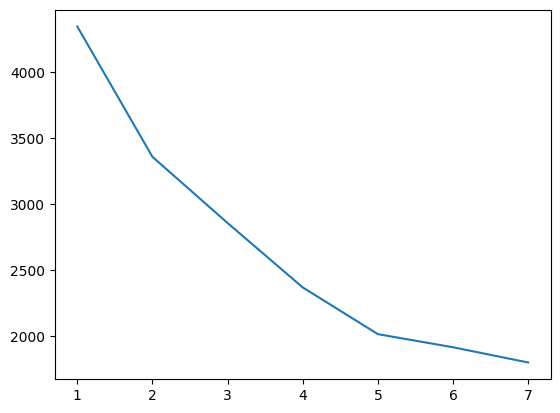

In [146]:
plt.plot(x_axis,inertia)

In [147]:
x1_axis=np.arange(2,8)

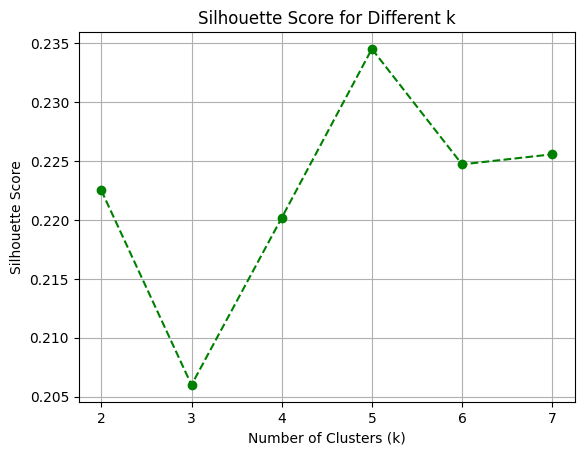

In [148]:
silhouette_scores = []
for k in range(2,8):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x_Scaled)
  score = silhouette_score(x_Scaled, labels)
  silhouette_scores.append(score)

x1_axis = np.arange(2,8)
plt.plot(x1_axis, silhouette_scores, marker='o', color='green', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.grid(True)
plt.show()

In [149]:
final_kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
final_kmeans.fit(x_Scaled)
final_labels=final_kmeans.labels_

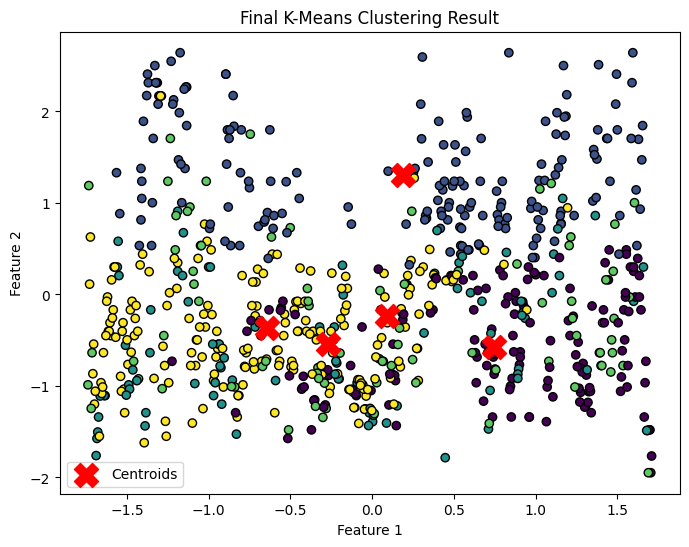

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(x_Scaled[:, 0], x_Scaled[:, 1], c=final_labels, cmap='viridis', edgecolor='k')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Final K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Agglomerative Hierarchical Clustering

In [152]:
model = AgglomerativeClustering(linkage = "average")

In [153]:
labels = model.fit_predict(x_Scaled)

In [154]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
linkage_matrix = linkage(x_Scaled, method = 'average')

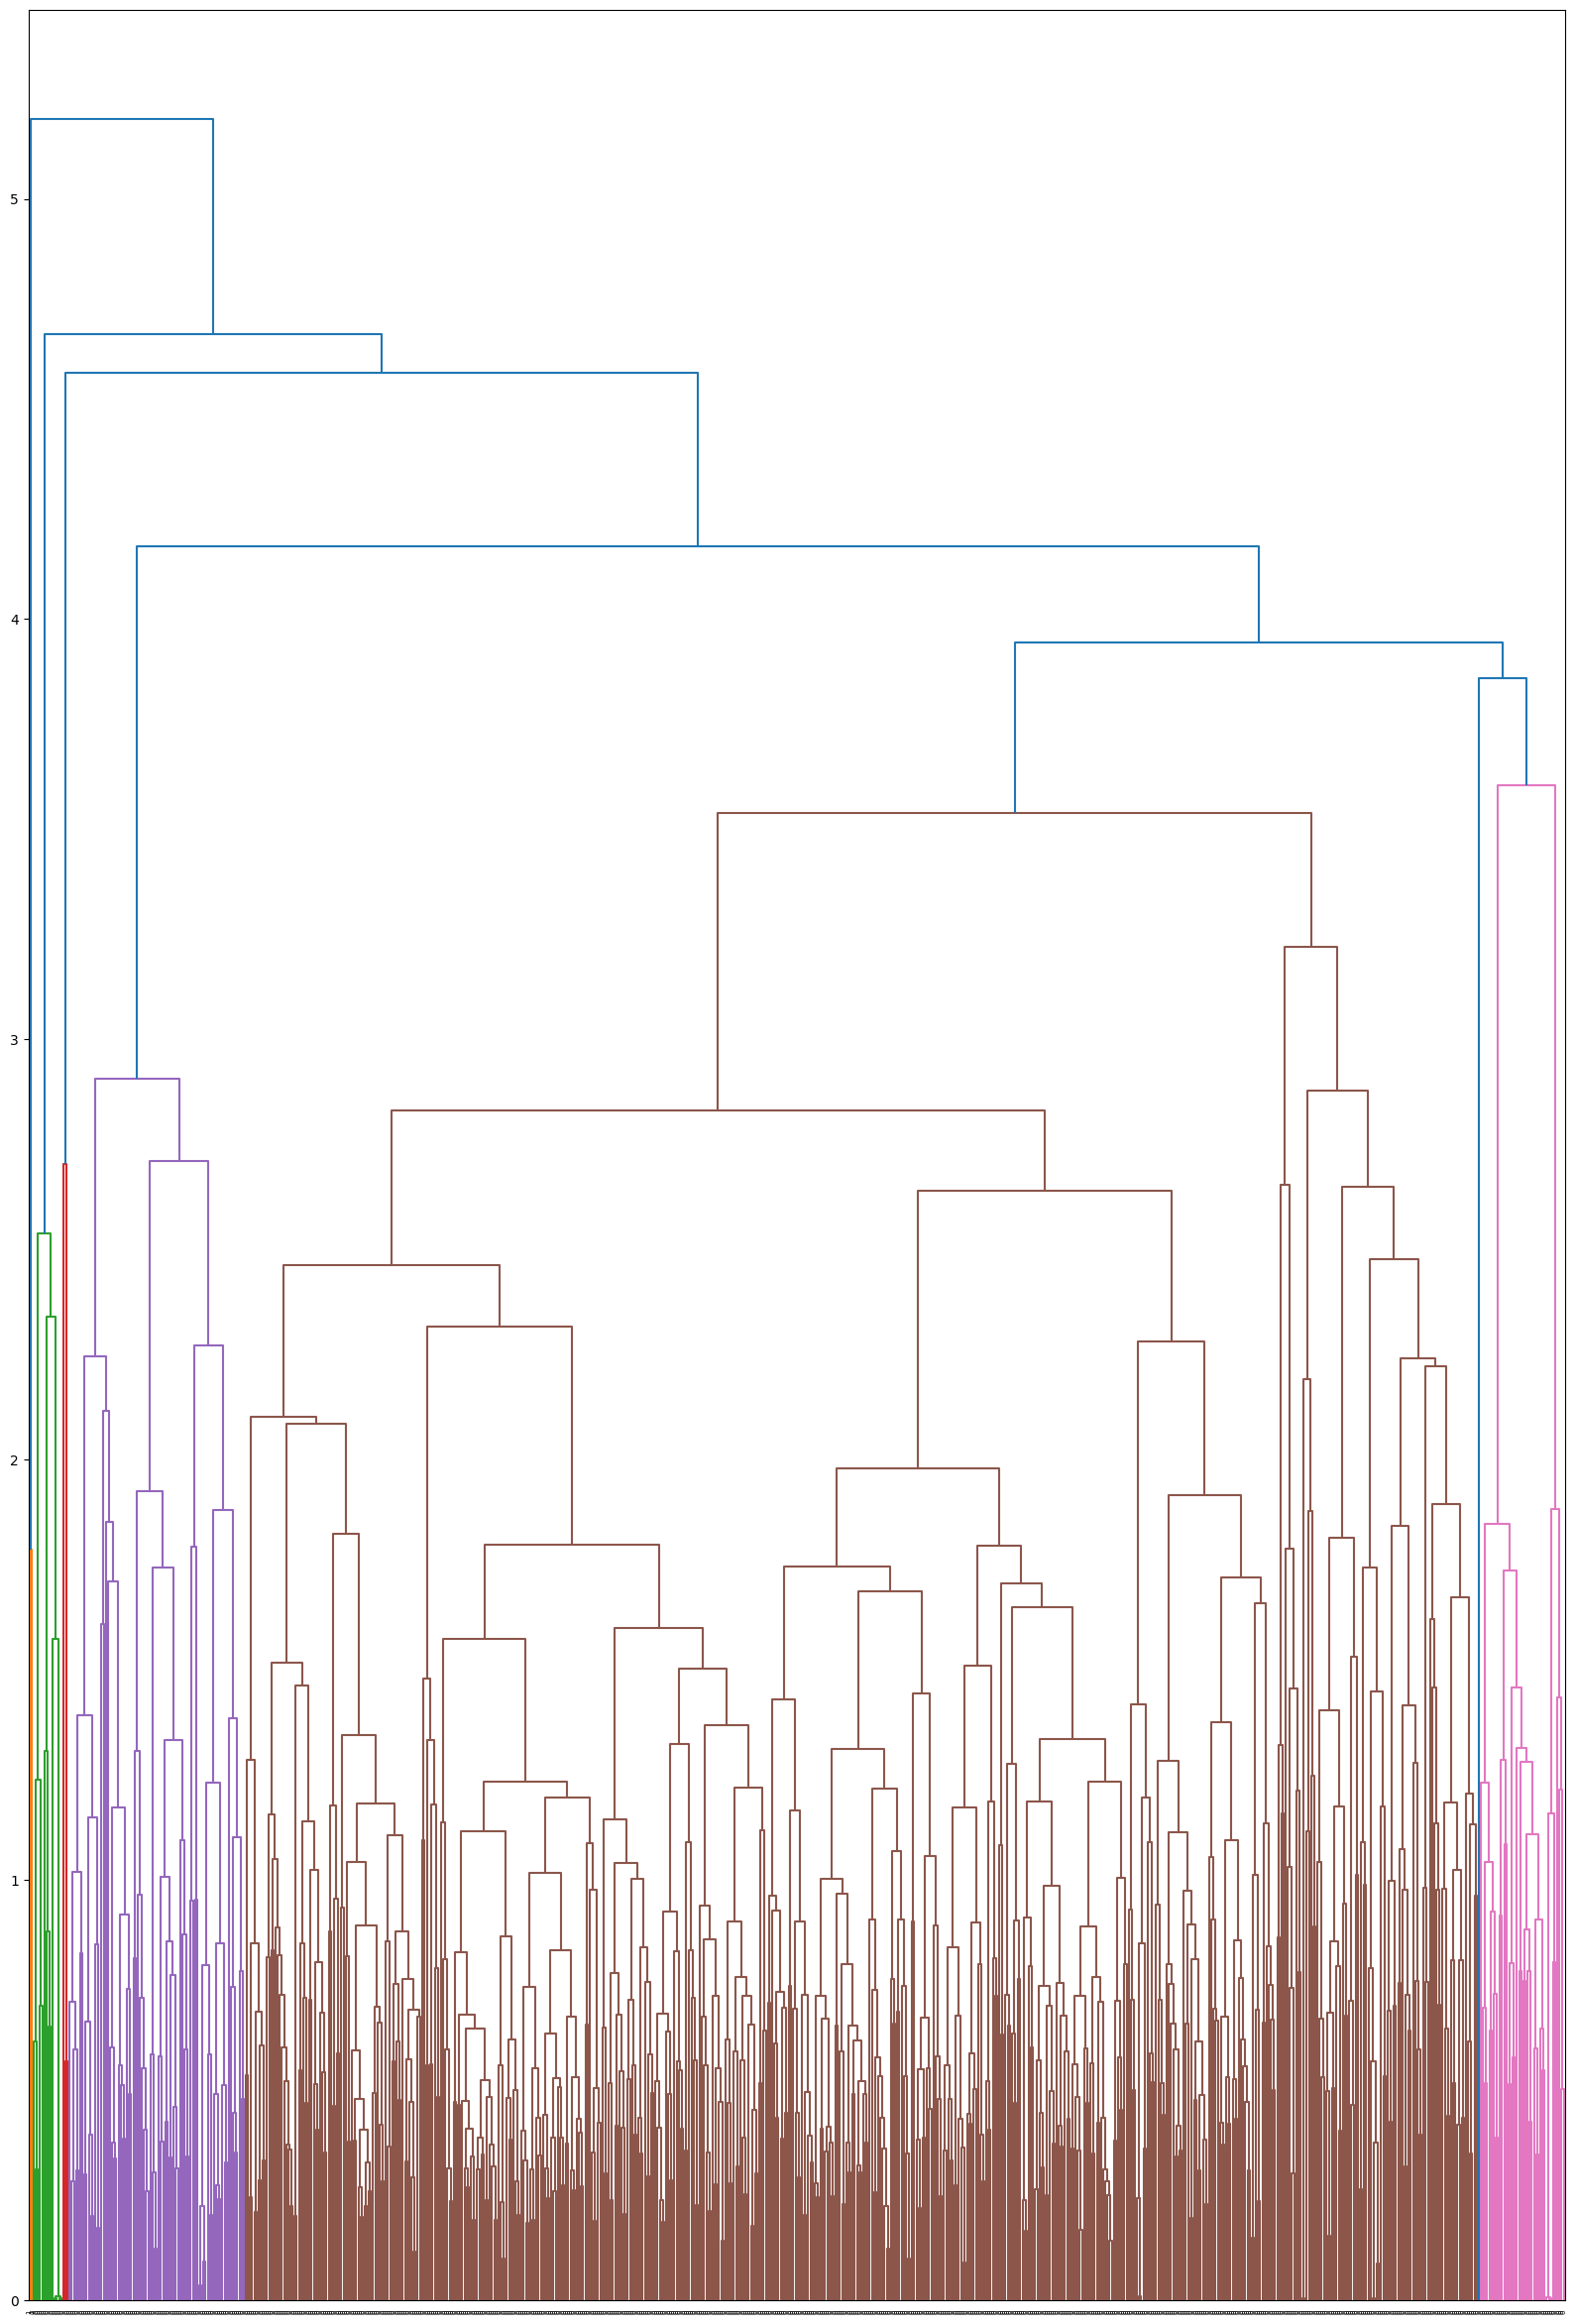

In [156]:
plt.figure(figsize = (20,30))
dendrogram(linkage_matrix, labels=labels[:])
plt.show()

In [157]:
model = AgglomerativeClustering(n_clusters = 5,linkage = "ward")

In [158]:
labels = model.fit_predict(x_Scaled)

[]

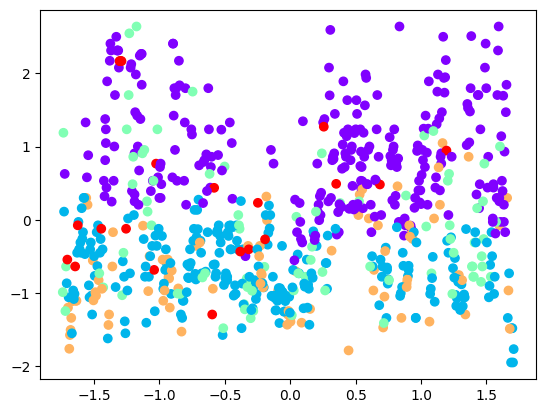

In [159]:
plt.scatter(x_Scaled[:,0], x_Scaled[:,1], c=labels, cmap = 'rainbow')
plt.plot()

Applying 2-Cluster Solution Based on Domain Knowledge

In [161]:
final_kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
final_kmeans.fit(x_Scaled)
final_labels=final_kmeans.labels_

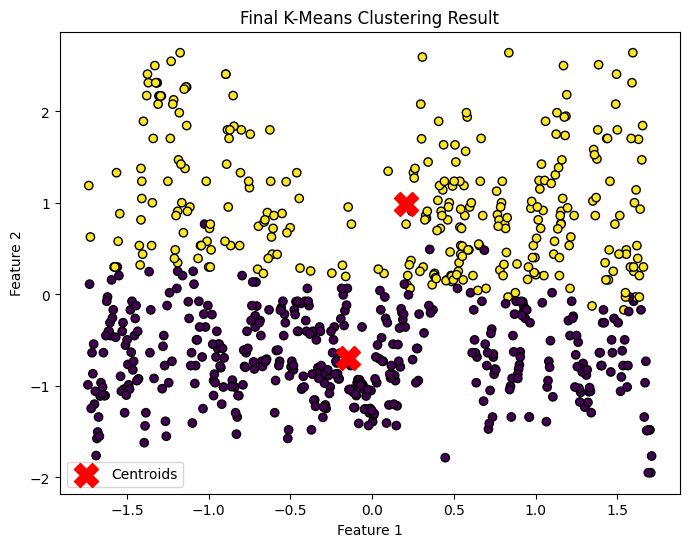

In [162]:
plt.figure(figsize=(8,6))
plt.scatter(x_Scaled[:, 0], x_Scaled[:, 1], c=final_labels, cmap='viridis', edgecolor='k')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Final K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [163]:
final_kmeans.cluster_centers_

array([[-0.14632234, -0.6894744 , -0.56388537, -0.09923944,  0.08658228,
         0.34881351],
       [ 0.2091722 ,  0.98562448,  0.80609117,  0.14186578, -0.12377199,
        -0.49863944]])

In [164]:
df_3['clusters']=final_labels

<ipython-input-164-b14354d4aa84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['clusters']=final_labels


In [165]:
y=final_labels

Supervised ML

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.2,random_state=42)

In [167]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(n_jobs=4)
}

In [168]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Classification Report': report
    }

for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"\nClassification Report:\n{metrics['Classification Report']}")



Logistic Regression Results:
Accuracy: 0.9931

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.98      0.99        58

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145


SVM Results:
Accuracy: 0.9655

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        87
           1       0.95      0.97      0.96        58

    accuracy                           0.97       145
   macro avg       0.96      0.97      0.96       145
weighted avg       0.97      0.97      0.97       145


KNN Results:
Accuracy: 0.9310

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.94      0.88      0.91        58

 

Hyperparameter Tunning

In [169]:
svm_model=SVC()

In [170]:
params_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}


In [171]:
grid_model=GridSearchCV(estimator=svm_model,param_grid=params_grid,cv=5,verbose=3,scoring='accuracy')

In [172]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=3)

In [173]:
grid_model.best_score_

np.float64(0.9982758620689655)

In [174]:
best_params=grid_model.best_params_
best_params

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [175]:
best_model = grid_model.best_estimator_

In [176]:
y_pred1=best_model.predict(x_test)

In [177]:
print(accuracy_score(y_test, y_pred1))

1.0


In [178]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        58

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



In [179]:
with open('final_svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [180]:
with open('final_svm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [181]:
y_pred_loaded = loaded_model.predict(x_test)